In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('heart.csv')

In [16]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
# df.isna().sum()
# df.duplicated().sum()

np.int64(0)

<Axes: xlabel='RestingBP', ylabel='Count'>

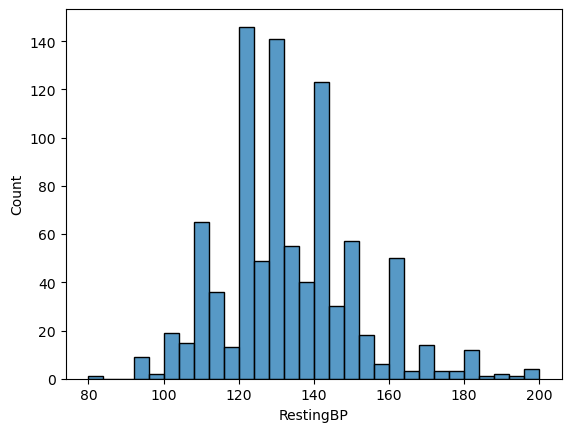

In [4]:
restingBP_mean = df.loc[df['RestingBP']!=0, 'RestingBP'].mean()
df['RestingBP'] = df['RestingBP'].replace(0, restingBP_mean)
#sns.histplot(x=df['RestingBP'])

In [5]:
cholestrolMean = df.loc[df['Cholesterol']!=0, 'Cholesterol'].mean()
df['Cholesterol'] = df['Cholesterol'].replace(0,cholestrolMean)
df['Cholesterol'] = df['Cholesterol'].round(2)
# sns.histplot(df['Cholesterol'])

In [44]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [45]:
df_encoded = df_encoded.astype(int)
df_encoded.head(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [69]:
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [72]:
scaler = StandardScaler()
X_Scaled_train = scaler.fit_transform(X_train)
X_Scaled_test = scaler.fit_transform(X_test)

# Logistic Regression Model

In [73]:
logistic_Model = LogisticRegression()
logistic_Model.fit(X_Scaled_train,y_train)

LogisticRegression()

In [74]:
y_logistic_predict = logistic_Model.predict(X_Scaled_test)

In [75]:
logistic_Accuracy = accuracy_score(y_test, y_logistic_predict)
logistic_Accuracy

0.8695652173913043

In [52]:
print(confusion_matrix(y_test, y_logistic_predict))

[[67 10]
 [17 90]]


In [15]:
print(classification_report(y_test, y_logistic_predict))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        77
           1       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



# KNN Model

In [76]:
kNN_Model = KNeighborsClassifier()
kNN_Model.fit(X_Scaled_train,y_train)

KNeighborsClassifier()

In [77]:
y_KNN_predict = kNN_Model.predict(X_Scaled_test)
kNN_Accuracy = accuracy_score(y_test, y_KNN_predict)
kNN_Accuracy

0.8641304347826086

In [56]:
print(confusion_matrix(y_test, y_KNN_predict))

[[49 28]
 [31 76]]


In [57]:
print(classification_report(y_test, y_KNN_predict))

              precision    recall  f1-score   support

           0       0.61      0.64      0.62        77
           1       0.73      0.71      0.72       107

    accuracy                           0.68       184
   macro avg       0.67      0.67      0.67       184
weighted avg       0.68      0.68      0.68       184



# Naive Bayes Model

In [78]:
nb_Model = GaussianNB()
nb_Model.fit(X_Scaled_train, y_train)

GaussianNB()

In [79]:
nb_predict = nb_Model.predict(X_Scaled_test)

In [80]:
nb_Accuracy = accuracy_score(y_test,nb_predict)
nb_Accuracy

0.8532608695652174

In [27]:
print(confusion_matrix(y_test, nb_predict))

[[69  8]
 [21 86]]


In [28]:
print(classification_report(y_test, nb_predict))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        77
           1       0.91      0.80      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



# Decision Tree Model

In [81]:
dt_Model = DecisionTreeClassifier()
dt_Model.fit(X_Scaled_train,y_train)

DecisionTreeClassifier()

In [83]:
dt_predict = dt_Model.predict(X_Scaled_test)

In [85]:
dt_Accuracy = accuracy_score(y_test, dt_predict)
dt_Accuracy

0.7663043478260869

In [34]:
print(confusion_matrix(y_test, dt_predict))

[[70  7]
 [26 81]]


In [35]:
print(classification_report(y_test, dt_predict))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81        77
           1       0.92      0.76      0.83       107

    accuracy                           0.82       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.84      0.82      0.82       184



# SVM Model 

In [86]:
svm_Model = SVC()
svm_Model.fit(X_Scaled_train, y_train)

SVC()

In [87]:
svm_predict = svm_Model.predict(X_Scaled_test)

In [88]:
svm_Accuracy = accuracy_score(y_test, svm_predict)
svm_Accuracy

0.8478260869565217

In [41]:
print(confusion_matrix(y_test, svm_predict))

[[51 26]
 [36 71]]


In [89]:
print(classification_report(y_test, svm_predict))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        77
           1       0.88      0.86      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184



In [91]:
import joblib

In [92]:
joblib.dump(logistic_Model,'Logistic_Model.pkl')

['Logistic_Model.pkl']